# Weekly activities
1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?
2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.
3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

# Useful links:
- Learn more about different types of image filters: https://setosa.io/ev/image-kernels/

1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?

In [15]:
img = cv.imread('images/native-bee.png')

kernel = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])
kernel2 = np.array([[-1, -1,-1,-1,-1],
                   [-1, -1, -1,-1,-1],
                   [-1, -1, 25,-1,-1],
                    [-1, -1, -1,-1,-1],
                    [-1, -1, -1,-1,-1]]
                  )
sharp_img = cv.filter2D(img, -1, kernel)
sharper_img = cv.filter2D(img,-1,kernel2)
cv.imshow('native bee 3x3 kernel',sharp_img)
cv.imshow( 'native bee 5x5 kernel',sharper_img)
cv.waitKey(0)
cv.destroyAllWindows()


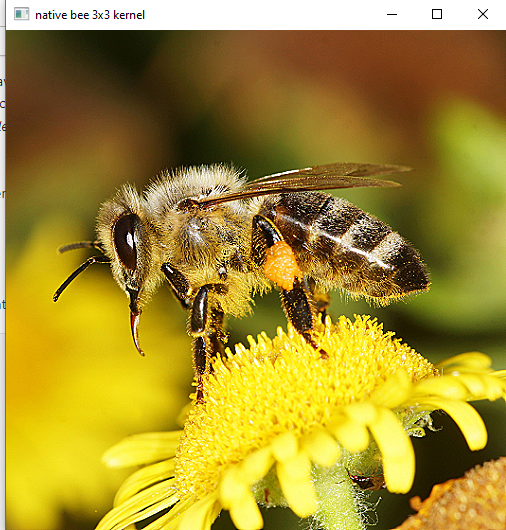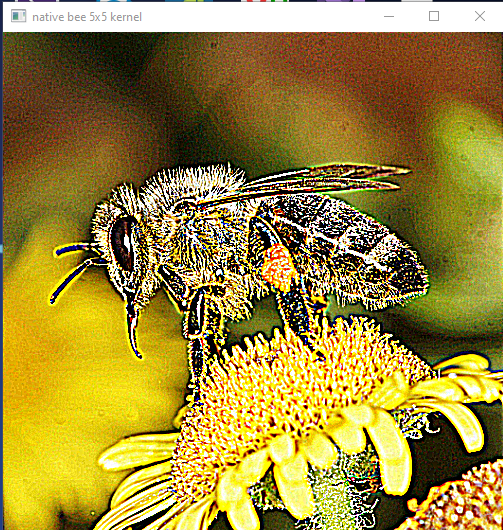

2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

In [20]:
img = cv.imread('images/noise_lena.jpg')
average_img = cv.blur(img,(5,5))

gaussian_img = cv.GaussianBlur(img,(5,5), 0)

median_filtered_img = cv.medianBlur(img,5)
cv.imshow('Average filter kernel',average_img)
cv.imshow('Gaussian kernel',gaussian_img)
cv.imshow('Median filter kernel',median_filtered_img)
cv.waitKey(0)
cv.destroyAllWindows()


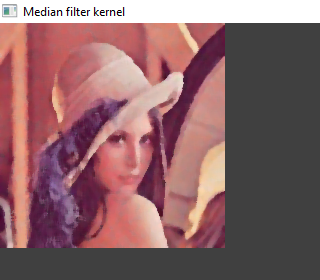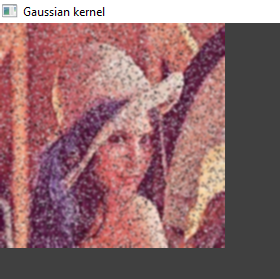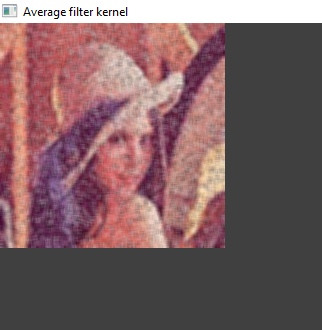

Average Filter: This filter will blur the image and reduce noise, but it may also cause loss of detail and sharpness, particularly at edges. It’s less effective against salt-and-pepper noise and may smooth out fine details.

Gaussian Filter: This technique will blur the image in a more controlled manner compared to the average filter. It effectively reduces Gaussian noise and smoothens the image while preserving edges better than the average filter.

Median Filter: This filter is especially good at handling salt-and-pepper noise. It removes noise by replacing pixel values with the median of their neighbors, which means it preserves edges better than the average filter and is more robust against impulse noise.

3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

(-0.5, 767.5, 513.5, -0.5)

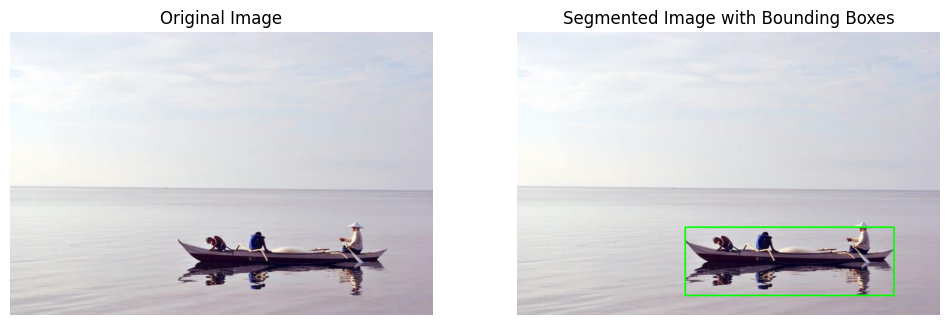

In [23]:
import matplotlib.pyplot as plt
image = cv.imread('images/boat.jpg')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Otsu's thresholding

_, binary_mask = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
# Find contours in the binary mask

contours,_= cv.findContours(binary_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the detected contours
output_image = image.copy()
contour_max_area = max(contours,key=cv.contourArea)
x, y, w, h = cv.boundingRect(contour_max_area)
cv.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
"""
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
"""
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image with Bounding Boxes')
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.axis('off')